In [ ]:
!pip install ipython-autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=f3c1e927ffdece0fe29f7d81392dce786ad7200c1fe3fb6cddd4950aca78610b
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
%load_ext autotime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping, ModelCheckpoint
import pickle

from tensorflow import keras
from sklearn import svm, metrics

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

2.2.0


In [ ]:
# !cat /proc/cpuinfo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%load_ext autotime

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 21.6 s


In [ ]:
DATA_PATH= 'drive/My Drive/MasterNU/RevisionBSLDigits/PickleData/'

time: 1.31 ms


In [ ]:
x = pickle.load(open(DATA_PATH+'X.pickle','rb'))
y = pickle.load(open(DATA_PATH+'y.pickle','rb'))

time: 3.09 s


In [ ]:
print("Length of x: ", len(x))
print("Length of y: ", len(y))

Length of x:  10000
Length of y:  10000
time: 1.67 ms


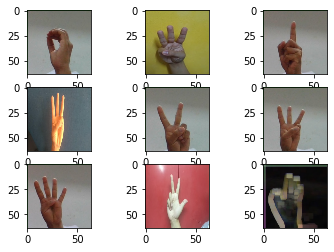

In [ ]:
# listRange = range(70, 79, 1)
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x[i])
plt.show()

In [ ]:
y[:9]

[0, 6, 1, 6, 2, 6, 4, 3, 9]

In [ ]:
x.shape

(10000, 64, 64, 3)

In [ ]:
IMG_SIZE = 64

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

y = np.array(y)

time: 54 ms


In [ ]:
x.shape

(10000, 64, 64, 3)

In [ ]:
y.shape

(10000,)

In [ ]:
# x=x/255.0

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2)

time: 73.3 ms


In [ ]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)

xtrain shape:  (8000, 64, 64, 3)
xtest shape:  (2000, 64, 64, 3)
time: 1.75 ms


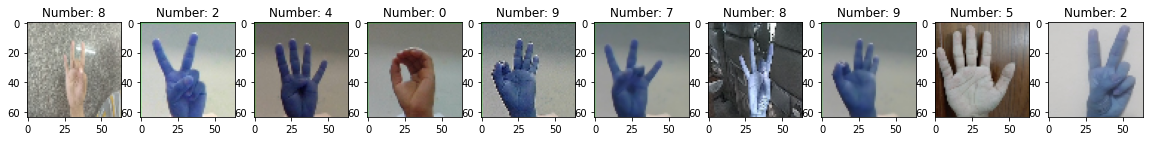

time: 1.35 s


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(xtrain[900:910], ytrain[900:910])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
xtrain.shape

(8000, 64, 64, 3)

In [ ]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(kernel='linear', verbose=True)
#fit to the trainin data
classifier.fit(np.reshape(xtrain, (xtrain.shape[0], -1)), ytrain)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

time: 46min 36s


In [ ]:
# now to Now predict the value of the digit on the test data
# xtest=np.reshape(xtest, (xtest.shape[0], -1))
y_pred = classifier.predict(np.reshape(xtest, (xtest.shape[0], -1)))

time: 4min 5s


In [ ]:
from sklearn.metrics import accuracy_score
# calculate accuracy
accuracy = accuracy_score(ytest, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.5745
time: 4.08 ms


In [ ]:
print("Classification report for classifier %s:\n%s\n"%(classifier, metrics.classification_report(ytest, y_pred)))


Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True):
              precision    recall  f1-score   support

           0       0.56      0.60      0.58       196
           1       0.56      0.66      0.60       212
           2       0.52      0.58      0.55       179
           3       0.57      0.60      0.58       202
           4       0.61      0.64      0.62       201
           5       0.59      0.55      0.57       199
           6       0.53      0.53      0.53       205
           7       0.59      0.55      0.57       205
           8       0.62      0.47      0.54       201
           9       0.62      0.57      0.59       200

    accuracy                           0.57      2000
   macro avg       0.58      0.57      0.57      2000
weight

In [ ]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(ytest, y_pred))

Confusion matrix:
[[117  17  20   8   4   5   3  10   3   9]
 [ 12 139  17   6   7   4  11   4   8   4]
 [  4  10 103   8  10   6  19   7   7   5]
 [ 10  12  10 121   8  13   6   4   5  13]
 [  5  10  12  11 129  11   5   9   2   7]
 [  9   9   3  13  12 110  16   8  10   9]
 [ 12  11  10  10   9   6 109  16  11  11]
 [ 12  14  12  11  14   9   6 112   7   8]
 [ 14  19   7  13  13   9  17   9  95   5]
 [ 15   7   4  12   6  15  12  10   5 114]]
time: 15.1 ms


In [ ]:
#Getting the misclassified images’ index
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
correctClass =[]
for label, predict in zip(ytest, y_pred):
  if label != predict:
    misclassifiedIndexes.append(index)
  else:
    correctClass.append(index)

  index +=1
print('Total number of misclassified class: ', len(misclassifiedIndexes))
print('Total number of correctly classified class: ', len(correctClass))
print('Total number testing data: ', len(misclassifiedIndexes)+len(correctClass))

Total number of misclassified class:  851
Total number of correctly classified class:  1149
Total number testing data:  2000
time: 7.19 ms


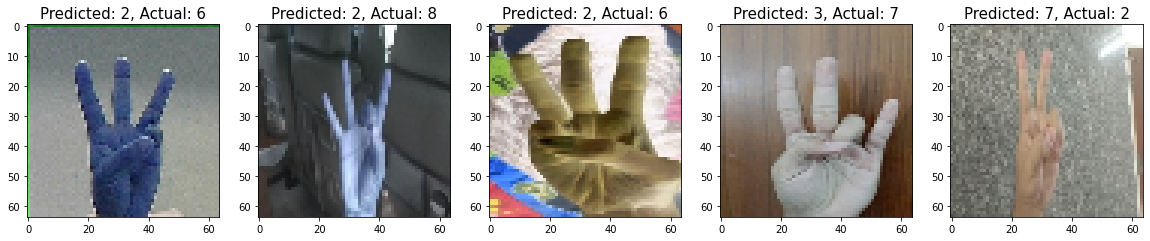

time: 755 ms


In [ ]:
#Showing the misclassified images and image labels using matplotlib
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
#  plt.imshow(np.reshape(xtest[badIndex]))
 plt.imshow(xtest[badIndex])
 plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], ytest[badIndex]), fontsize = 15)

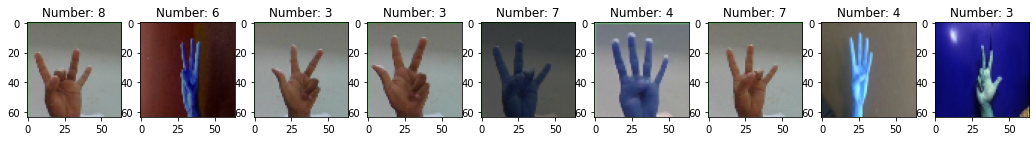

time: 1.06 s


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(xtest[:9], ytest[:9])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

time: 58.9 ms


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[117  17  20   8   4   5   3  10   3   9]
 [ 12 139  17   6   7   4  11   4   8   4]
 [  4  10 103   8  10   6  19   7   7   5]
 [ 10  12  10 121   8  13   6   4   5  13]
 [  5  10  12  11 129  11   5   9   2   7]
 [  9   9   3  13  12 110  16   8  10   9]
 [ 12  11  10  10   9   6 109  16  11  11]
 [ 12  14  12  11  14   9   6 112   7   8]
 [ 14  19   7  13  13   9  17   9  95   5]
 [ 15   7   4  12   6  15  12  10   5 114]]
time: 7.83 ms


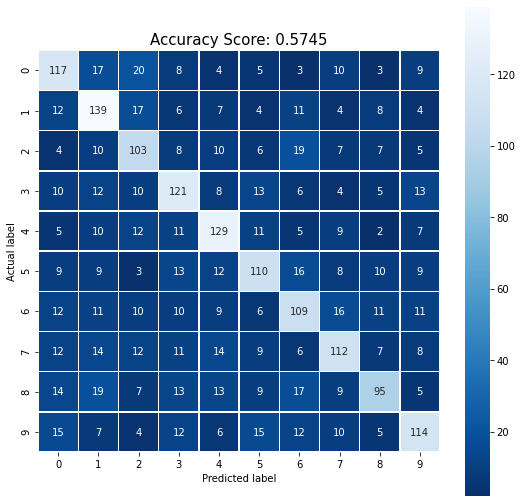

time: 1.18 s


In [ ]:
plt.figure(figsize=(9,9))
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
sns.heatmap(cm, annot=True, fmt="1", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);